In [30]:
import random

import numpy as np
from astropy.io import ascii as asc
import matplotlib.pyplot as plt
%matplotlib inline

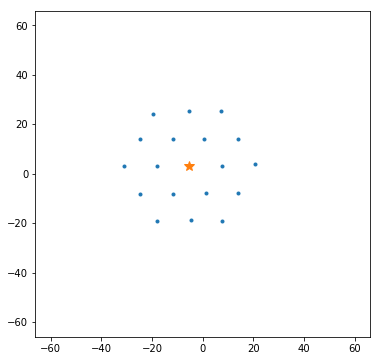

In [16]:
# Current method: Calculate mean of all segment locations
file = 'V2V3offsets.txt'
segment_data = asc.read(file)
# print(segment_data)

V2Mean = np.mean(segment_data['V2Seg'])
V3Mean = np.mean(segment_data['V3Seg'])
# print(V2Mean, V3Mean)

# Plot all segment locations and location mean
plt.figure(figsize=(6, 6))
plt.plot(segment_data['V2Seg'], segment_data['V3Seg'], marker='.', lw=0)
plt.plot(V2Mean, V3Mean, marker='*', ms=10)
plt.xlim(-1.1 * 60, 1.1*60)
plt.ylim(-1.1 * 60, 1.1*60)
plt.show()

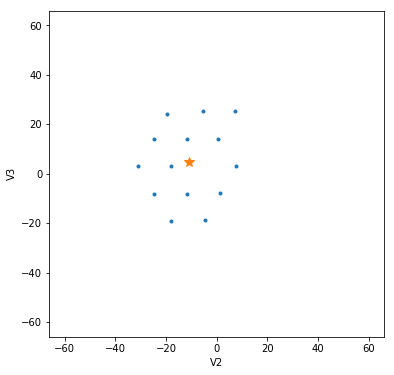

In [19]:
# Test what happens if some segments are missing?
data = segment_data[:-4]
new_mean = [np.mean(data['V2Seg']), np.mean(data['V3Seg'])]
plt.figure(figsize=(6, 6))
plt.plot(data['V2Seg'], data['V3Seg'], marker='.', lw=0)
plt.plot(new_mean[0], new_mean[1], marker='*', ms=10)
plt.xlim(-1.1 * 60, 1.1*60)
plt.ylim(-1.1 * 60, 1.1*60)
plt.xlabel('V2')
plt.ylabel('V3')
plt.show()

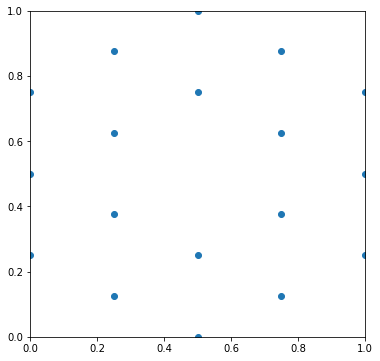

[0.25, 0.27950849718747373, 0.27950849718747373, 0.45069390943299864, 0.45069390943299864, 0.55901699437494745, 0.55901699437494745, 0.67314560089181297, 0.67314560089181297, 0.70710678118654757, 0.70710678118654757, 0.75, 0.90138781886599728, 0.90138781886599728, 0.91001373616006476, 0.91001373616006476, 1.0]


In [71]:
# Define the desired grid
x_list = (np.array([3, 2, 4, 1, 3, 5, 2, 4, 1, 5, 2, 4, 1, 3, 5, 2, 4, 3]) - 1)/4
y_list = (np.array([9, 8, 8, 7, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 3, 2, 2, 1]) - 1)/8

plt.figure(figsize=(6,6))
plt.scatter(x_list, y_list)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

dists = []
for i in range(17):
    xdiff = x_list[17] - x_list[i]
    ydiff = y_list[17] - y_list[i]
    dist = np.sqrt(xdiff**2 + ydiff**2)
    dists.append(dist)
    
print(sorted(dists))

In [47]:
# Create algorithm that will be better...

def find_array_center(V2_arr, V3_arr):
    n_segments = len(V2_arr)
    if n_segments == 18:
        arr_V2center = np.mean(V2_arr)
        arr_V3center = np.mean(V3_arr)
        print(arr_V2center, arr_V3center)
    else:
        print('Incomplete array; only {} segments.'.format(n_segments))
    
    # Print distance between the segment with smallest V2 and all others
    i_ref = list(V2_arr).index(min(V2_arr))
    
    diffs = []
    for i in range(n_segments):
        if i != i_ref:
            V2diff = V2_arr[i_ref] - V2_arr[i]
            V3diff = V3_arr[i_ref] - V3_arr[i]
            dist = np.sqrt(V2diff**2 + V3diff**2)
            diffs.append(dist)
            print(dist, V2diff, V3diff)
    
    return diffs

In [48]:
diffswhole = find_array_center(segment_data['V2Seg'], segment_data['V3Seg'])
diffs_part = find_array_center(data['V2Seg'], data['V3Seg'])

-5.42033333333 3.06666666667
12.7948030465 -6.348 -11.109
12.666716228 -6.21 11.04
24.0537008587 -11.523 -21.114
12.8341854825 -12.834 -0.069
25.5141437246 -12.903 22.011
22.0977819023 -19.182 -10.971
22.1919490131 -19.251 11.04
34.0258862633 -25.53 -22.494
34.0132908728 -26.22 21.666
33.387017387 -31.533 -10.971
33.9088493759 -32.085 10.971
44.308209104 -38.295 -22.287
38.4335574466 -38.433 -0.207
44.349612456 -38.502 22.011
46.1717767689 -44.781 -11.247
46.1397484714 -44.85 10.833
51.6197941976 -51.612 -0.897
Incomplete array; only 14 segments.
12.7948030465 -6.348 -11.109
12.666716228 -6.21 11.04
24.0537008587 -11.523 -21.114
12.8341854825 -12.834 -0.069
25.5141437246 -12.903 22.011
22.0977819023 -19.182 -10.971
22.1919490131 -19.251 11.04
34.0258862633 -25.53 -22.494
34.0132908728 -26.22 21.666
33.387017387 -31.533 -10.971
33.9088493759 -32.085 10.971
44.308209104 -38.295 -22.287
38.4335574466 -38.433 -0.207


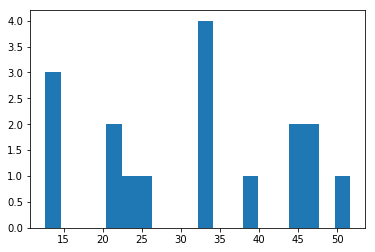

[12.666716227973216, 12.7948030465498, 12.834185482530634, 22.097781902263407, 22.191949013099325, 24.053700858703635, 25.514143724608907, 33.387017387002395, 33.908849375937251, 34.013290872833814, 34.025886263255515, 38.43355744658566, 44.308209103957253, 44.349612456029426, 46.139748471356015, 46.171776768931046, 51.619794197575025]


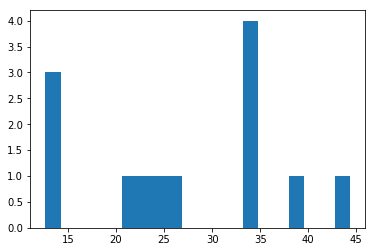

[12.666716227973216, 12.7948030465498, 12.834185482530634, 22.097781902263407, 22.191949013099325, 24.053700858703635, 25.514143724608907, 33.387017387002395, 33.908849375937251, 34.013290872833814, 34.025886263255515, 38.43355744658566, 44.308209103957253]


In [57]:
plt.hist(diffswhole, bins=20)
plt.show()
print(sorted(diffswhole))


plt.hist(diffs_part, bins=20)
plt.show()
print(sorted(diffs_part))